# Amdahl je kámoš

# Nenapíšeš cyklus!

## Násobení matic

In [4]:
loop_times = []
numpy_times = []

In [5]:
import random
from timeit import default_timer as timer

N = 300
A = [ [ random.random() for _ in range(N)] for _ in range(N)]
B = [ [ random.random() for _ in range(N)] for _ in range(N)]
C = [ [ 0. for _ in range(N)] for _ in range(N)]

start = timer()
for i in range(N):
    for j in range(N):
        for k in range(N):
            C[i][j] += A[i][k] * B[k][j]
            
end = timer()
loop_times.append(end-start)
sorted(loop_times)

[6.234970297897235]

In [9]:
N = 10000
import numpy as np
A = np.zeros((N,N),dtype=np.float32)
A += np.random.rand(N,N)
B = np.zeros((N,N),dtype=np.float32)
B += np.random.rand(N,N)

start = timer()
C = np.matmul(A,B)
end = timer()
numpy_times.append(end-start)
sorted(numpy_times)


NameError: name 'timer' is not defined

In [7]:
N = 300
C = np.zeros((N,N),dtype=np.float32)

start = timer()
for i in range(N):
    for j in range(N):
        for k in range(N):
            C[i][j] += A[i][k] * B[k][j]
            
end = timer()
end-start

24.355323505820706

## Stabilita trajektorie

- Vývoj nějakého procesu v čase -- posloupnost $m$ bodů $x_k\in R^n$
- Chceme zjistit, zda se děje ještě něco nového, nebo se vše podstatné už jen opakuje

- Korelace jenotlivých souřadnic
$$ c_{ij} = \sum_{k=1}^m (x_{ik} - \bar x_i) ( x_{jk} - \bar x_j) $$
kde $ \bar x_i = \sum_{k=1}^m x_{ki}/m$

- Největší vlastní hodnoty matice korelaci (do součtu 90 % apod) postihují ,,to podstatné``
- Pokud se významně nezmění mezi např. 70 % a 100 % trajektorie, lze tvrdit, že už je stabilní
- Jako domácí cvičení z lineární algebry si rozmyslete, proč to funguje


In [7]:
import mdtraj as md

tr = md.load('pbc3.xtc',top='1L2Y.pdb')
idx=tr.top.select("protein and element != H")
tr.atom_slice(idx,inplace=True)
tr

<mdtraj.Trajectory with 20001 frames, 154 atoms, 20 residues, and unitcells at 0x7fd918d81128>

In [34]:
tr.xyz.shape

(20001, 154, 3)

In [25]:
xyz = np.reshape(tr.xyz,(tr.xyz.shape[0],tr.xyz.shape[1]*3))

xyz_avg = np.average(xyz,axis=0)
xyz -= xyz_avg

cor = np.matmul(np.transpose(xyz),xyz)
cor /= xyz.shape[0]

eig = np.abs(np.sort(np.linalg.eigvalsh(cor)))

sum = np.sum(eig)
eig /= sum
eig = np.flip(eig)
eig[-10:]

array([3.6393777e-09, 3.8691041e-09, 3.9732115e-09, 4.2129775e-09,
       4.4868429e-09, 4.7057238e-09, 5.0029354e-09, 5.3640878e-09,
       5.9629777e-09, 6.4575514e-09], dtype=float32)

In [26]:
tr2 = tr[:int(.8*tr.xyz.shape[0]):]
xyz2 = np.reshape(tr2.xyz,(tr2.xyz.shape[0],tr2.xyz.shape[1]*3))
xyz2_avg = np.average(xyz2,axis=0)
xyz2 -= xyz2_avg

cor2 = np.matmul(np.transpose(xyz2),xyz2)
cor2 /= xyz2.shape[0]

eig2 = np.abs(np.sort(np.linalg.eigvalsh(cor2)))

sum = np.sum(eig2)
eig2 /= sum
eig2 = np.flip(eig2)
eig2[:10]

array([8.2329732e-01, 1.0072484e-01, 5.5479806e-02, 7.1926229e-03,
       5.1617385e-03, 2.4225998e-03, 9.7599847e-04, 7.8792940e-04,
       7.2318432e-04, 3.9438155e-04], dtype=float32)

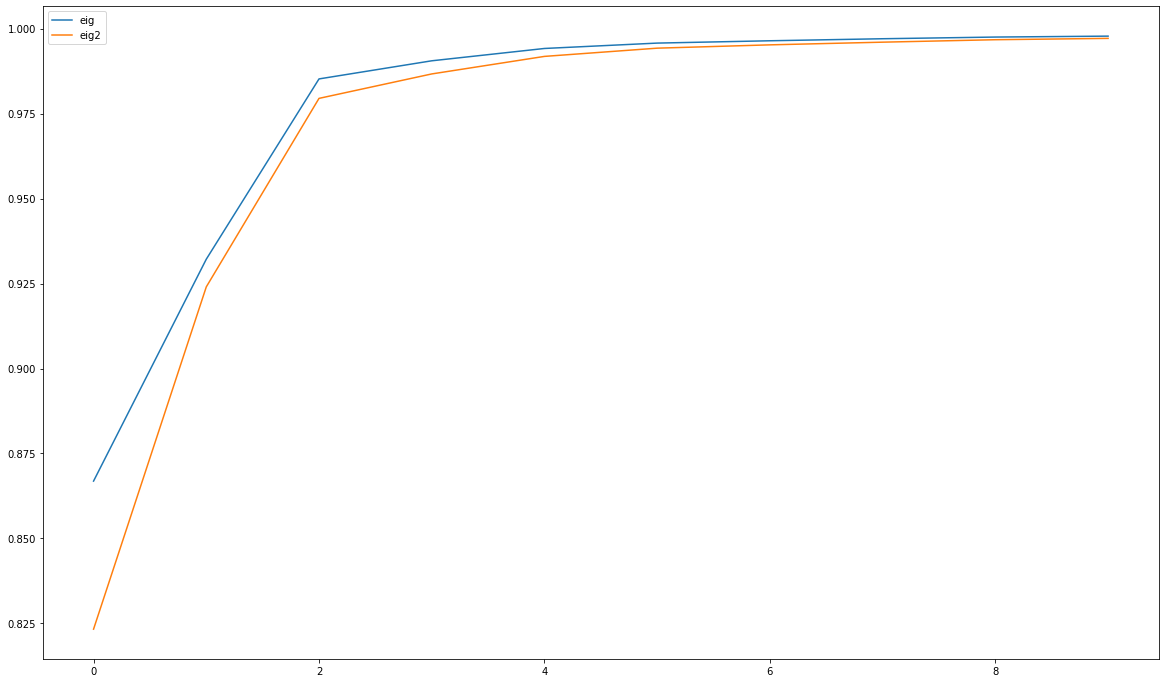

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,12))
plt.plot(np.cumsum(eig[:10]),label='eig')
plt.plot(np.cumsum(eig2[:10]),label='eig2')
plt.legend()
plt.show()

# Ať pracují jiní 

# Náboženství GILu

# A přece se kompiluje!